Uploading file from local PC to Google colab's Server

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving bank-additional-full.xlsx to bank-additional-full.xlsx


Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**

In [ ]:
bank = pd.read_excel('bank-additional-full.xlsx')

In [ ]:
print(bank.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [ ]:
print(bank['housing'].unique())
print(bank['loan'].unique())
print(bank['default'].unique())

['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['no' 'unknown' 'yes']


Getting to know the dataset

In [ ]:
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Changing the datatype of 'default', 'housing' and 'loan' columns, as they should be of type Boolean.**

In [ ]:
mapping = {'yes': True, 'no': False, 'unknown': np.nan}
bank['housing'] = bank['housing'].map(mapping).astype('boolean')
bank['loan'] = bank['loan'].map(mapping).astype('boolean')
bank['default'] = bank['default'].map(mapping).astype('boolean')

Checking the datatypes

In [ ]:
print(bank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         32591 non-null  boolean
 5   housing         40198 non-null  boolean
 6   loan            40198 non-null  boolean
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Checking the dataset after datatype conversion

In [ ]:
print(bank.head(10))

   age          job  marital            education  default  housing   loan  \
0   56    housemaid  married             basic.4y    False    False  False   
1   57     services  married          high.school     <NA>    False  False   
2   37     services  married          high.school    False     True  False   
3   40       admin.  married             basic.6y    False    False  False   
4   56     services  married          high.school    False    False   True   
5   45     services  married             basic.9y     <NA>    False  False   
6   59       admin.  married  professional.course    False    False  False   
7   41  blue-collar  married              unknown     <NA>    False  False   
8   24   technician   single  professional.course    False     True  False   
9   25     services   single          high.school    False     True  False   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0

**Encoding all the necessary categorical features**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

**Creating Models**

In [ ]:
Bank_Logistic_Model = LogisticRegression()

Bank_RandomForest_Model = RandomForestClassifier()

x = bank.drop('y', axis = 1)
y = bank['y']

# Encode the target variable 'y'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
categories = x

encoded_categories = pd.get_dummies(categories, drop_first = True)

**Checking the Categorized columns**

In [ ]:
print(encoded_categories.head())

   age  default  housing   loan  duration  campaign  pdays  previous  \
0   56    False    False  False       261         1    999         0   
1   57     <NA>    False  False       149         1    999         0   
2   37    False     True  False       226         1    999         0   
3   40    False    False  False       151         1    999         0   
4   56    False    False   True       307         1    999         0   

   emp.var.rate  cons.price.idx  ...  month_may  month_nov  month_oct  \
0           1.1          93.994  ...       True      False      False   
1           1.1          93.994  ...       True      False      False   
2           1.1          93.994  ...       True      False      False   
3           1.1          93.994  ...       True      False      False   
4           1.1          93.994  ...       True      False      False   

   month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0      False             True            False            Fal

**Training the Models**

In [ ]:
X_train, x_test, Y_train_encoded, y_test_encoded = train_test_split(encoded_categories, y_encoded, test_size = 0.2, random_state = 0)

Handling 'Unknown' values of Boolean datatype columns

In [ ]:
for col in ['default', 'housing', 'loan']:
    X_train[col].fillna(X_train[col].mode()[0], inplace=True)
    x_test[col].fillna(x_test[col].mode()[0], inplace=True)

/tmp/ipython-input-19-3350524705.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(X_train[col].mode()[0], inplace=True)
/tmp/ipython-input-19-3350524705.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

Feeding the Training data to the models

In [ ]:
Bank_Logistic_Model.fit(X_train, Y_train_encoded)
Bank_RandomForest_Model.fit(X_train, Y_train_encoded)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

**Evaluating the Models**

In [ ]:
bank_logistic_prediction = Bank_Logistic_Model.predict(x_test)
bank_randomforest_prediction = Bank_RandomForest_Model.predict(x_test)

bank_logistic_probs = Bank_Logistic_Model.predict_proba(x_test)[:, 1]
bank_randomforest_probs = Bank_RandomForest_Model.predict_proba(x_test)[:, 1]

Getting **f1_score** and **ConfusionMatrix**

Logistic Regression:
f1_score:  0.5401844532279315


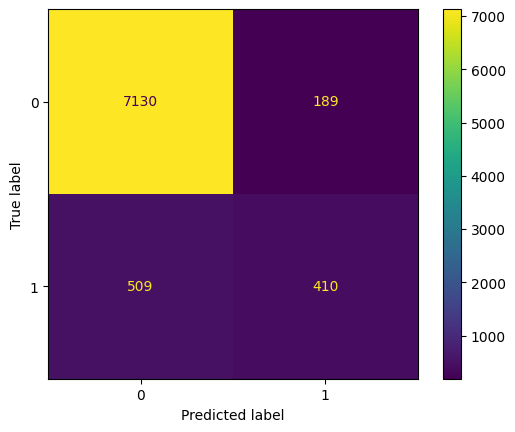

In [ ]:
print('Logistic Regression:')
print('f1_score: ', f1_score(y_test_encoded, bank_logistic_prediction, pos_label = 1))
ConfusionMatrixDisplay(confusion_matrix(y_test_encoded, bank_logistic_prediction)).plot()

Random Forest:
f1_score 0.5778894472361809


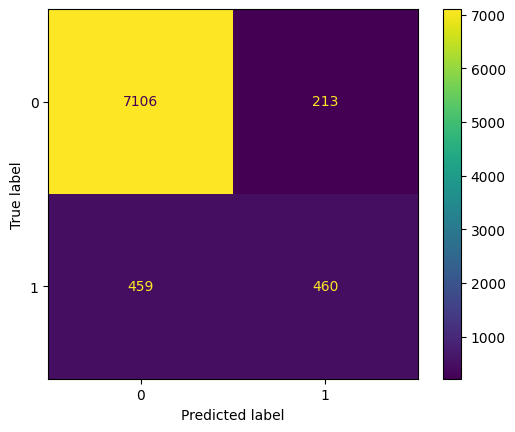

In [ ]:
print('Random Forest:')
print('f1_score', f1_score(y_test_encoded, bank_randomforest_prediction, pos_label = 1))

ConfusionMatrixDisplay(confusion_matrix(y_test_encoded, bank_randomforest_prediction)).plot()

Creating ROC Graph

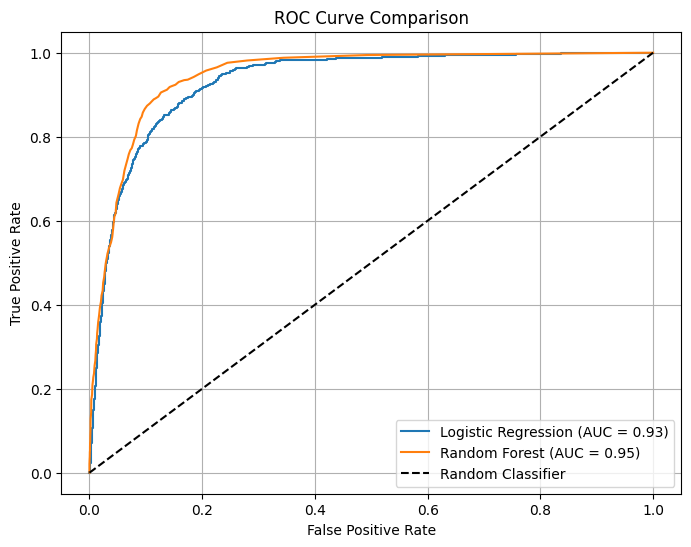

In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_test_encoded, bank_logistic_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test_encoded, bank_randomforest_probs)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test_encoded, bank_logistic_probs):.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test_encoded, bank_randomforest_probs):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

**Problem Statement and Objective**

Predict whether a bank customer will subscribe to a term deposit as a result of a marketing campaign.

**Dataset Description and Loading**

The Dataset was fetched from Kagglev and it has 21 columns 41189 rows.

**Data Cleaning and Preprocessing**

1. Converted Datatypes of housing, loan and default from Object to Boolean.
2. No Missing Values found.

**Model Building and Evaluation**

1. Created LogisticRegression and RandomForestCalssifier Models.
2. Evaluated the model using f1_score, confusionMatrixDisplay and ROC curve.

**Visualizations**

1. Used ConfustionMatricDisplay 'True label' vs 'Predicted label' for each model.
2. Used ROC curve for diaplying True Positive and False Positive rates.